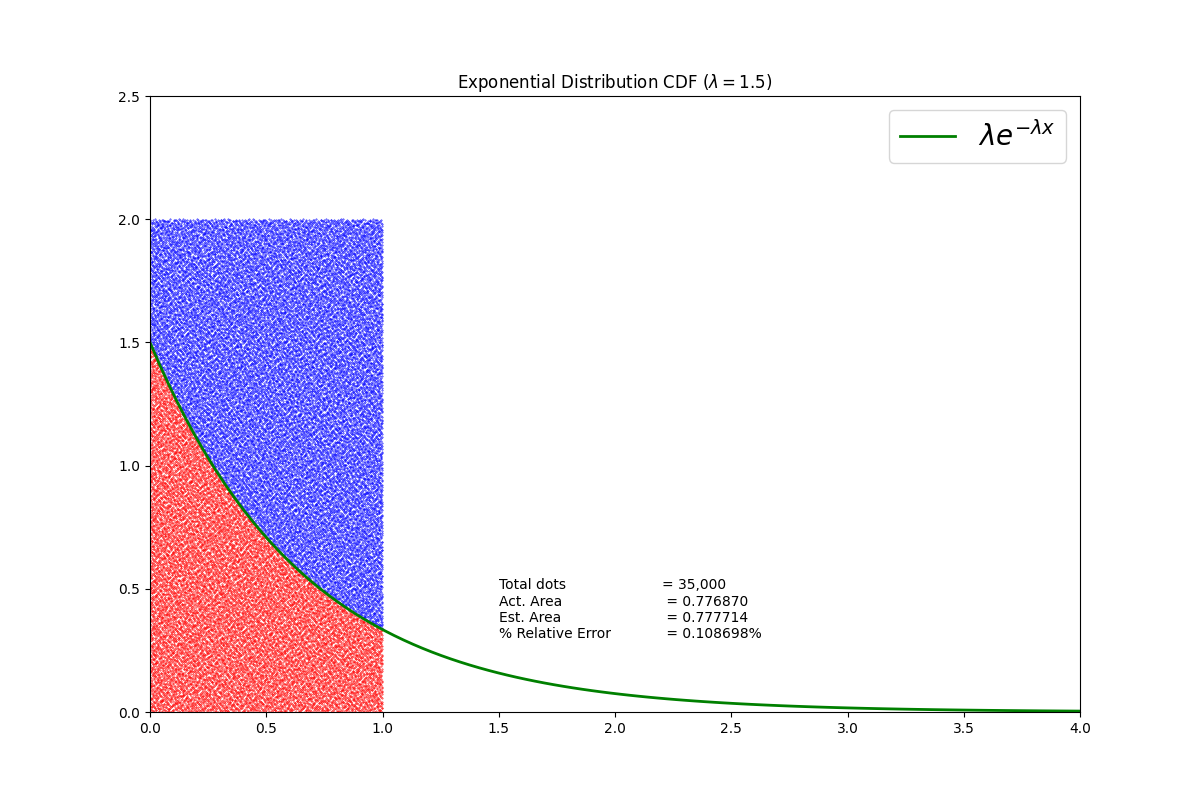

In [1]:
"""mc_exp_dist.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Rectangle
from numba import float64, vectorize # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

"""Dr. Biersach's solution"""
"""This program draws a plot showing the probability of an event occuring
within an hour of an exponential distribution having a rate parameter of 
90 minutes. This is done using a probability density function and a 
cumulative distribution function and the Hanlon method """
rate_param: float = 1.5
sample_area = Rectangle((0, 0), 1, 2)

def pdf(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return rate_param * np.exp(-rate_param * x)

def cdf(x: float) -> float:
    return 1 - np.exp(-rate_param * x)

@vectorize([float64(float64, float64)], nopython = True) #type: ignore
def hanlon(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h

def plot_exp_cdf(ax: Axes) -> None:
    iterations: int = 35_000

    primes: list(int) = (2, 3)

    x: NDArray[np.float_] = (
        sample_area.get_x()
        + hanlon(np.arange(iterations), primes[0]) * sample_area.get_width() # type: ignore
    )
    y: NDArray[np.float_] = (
        sample_area.get_y()
        + hanlon(np.arange(iterations), primes[1]) * sample_area.get_height() # type: ignore
    )
    d: NDArray[np.float_] = pdf(x) - y

    x_in: NDArray[np.float_] = x[d >= 0.0]
    y_in: NDArray[np.float_] = y[d >= 0.0]

    x_out: NDArray[np.float_] = x[d < 0.0]
    y_out: NDArray[np.float_] = y[d < 0.0]

    pixel_size: float = (72 / ax.figure.dpi) ** 2 # type: ignore
    ax.scatter(x_in, y_in, color = "red", marker = MarkerStyle("."), s = pixel_size)
    ax.scatter(x_out, y_out, color = "blue", marker = MarkerStyle("."), s = pixel_size)

    act_x: NDArray[np.float_] = np.linspace(0, 4, 100)
    act_y: NDArray[np.float_] = pdf(act_x)
    ax.plot(act_x, act_y, color = "green", linewidth = 2, label = r"$\lambda e^{-\lambda x}$")
    ax.legend(loc = "upper right", fontsize = "20")

    est_area: float = (
        np.count_nonzero(d >= 0.0)
        / iterations
        * (sample_area.get_width() * sample_area.get_height())
    )
    # This essentially does the equivalent of the integral
    act_area: float = cdf(sample_area.get_x() + sample_area.get_width()) - cdf(
        sample_area.get_x()
    )
    err: float = (est_area - act_area) / act_area

    ax.set_title(rf"Exponential Distribution CDF $(\lambda = {rate_param})$")
    ax.set_xlim(0, 4.0)
    ax.set_ylim(0, 2.5)

    ax.text(1.5, 0.3, "Total dots\nAct. Area\nEst. Area\n% Relative Error", ha = "left")
    ax.text(
        2.2,
        0.3,
        f"= {iterations:,}\n = {act_area:.6f}\n = {est_area:.6f}\n = {err:.6%}",
        ha = "left",
    )

def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize = (12, 8))
    plot_exp_cdf(plt.axes())
    plt.show()

main()
        